In [6]:
# Installation of the retina-face package.
!pip install retina-face

In [2]:
# To mount your Google Drive account to your Google Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
folder_path = "/content/drive/MyDrive/Pictures/M/" # The image folder location.
image_name = "DSCN8279.jpg" # Image name.

25-01-17 23:08:34 - Directory /root/.deepface created
25-01-17 23:08:34 - Directory /root/.deepface/weights created
25-01-17 23:08:34 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 146MB/s]


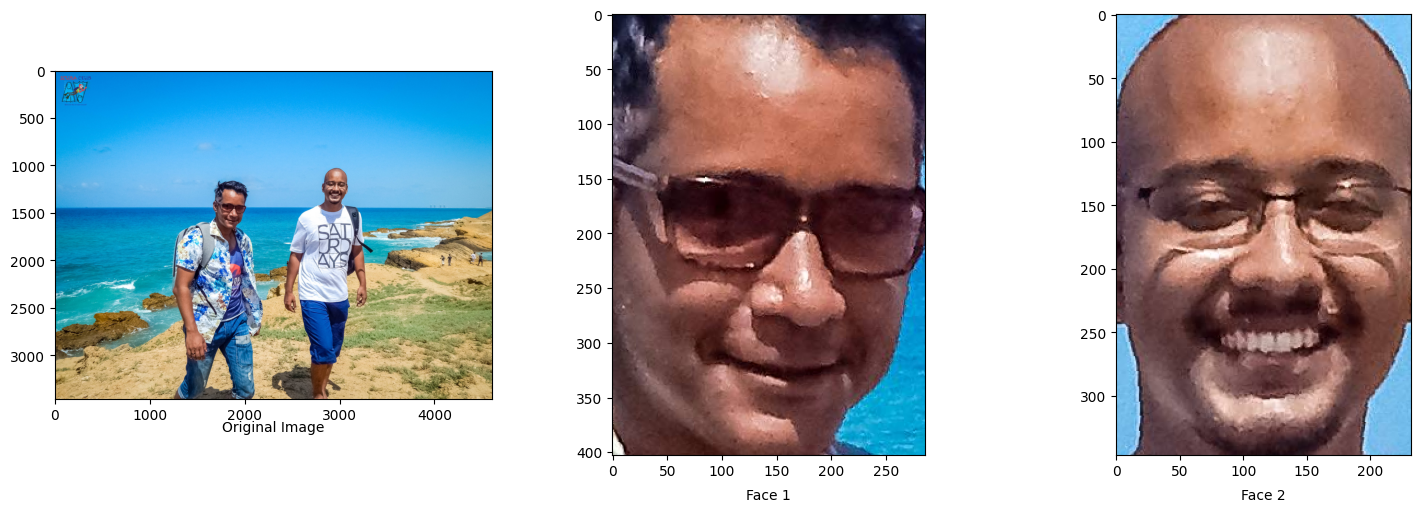

Successfully saved 2 face images


In [11]:
import cv2
import matplotlib.pyplot as plt

from retinaface import RetinaFace

image_path = folder_path+image_name # Set the image path.
base_image = cv2.imread(image_path) # Read the image.

# To implement face detection and alignment with RetinaFace.
faces = RetinaFace.extract_faces(img_path=image_path, align=True)

# Create subplots for each detected face + original
num_faces = len(faces)
fig, axes = plt.subplots(1, num_faces + 1, figsize=(15, 5)) # Adjust figsize as needed
fig.tight_layout()
axes = axes.ravel()

# Display the original image
axes[0].imshow(base_image[:, :, ::-1])
axes[0].text(0.5, -0.1, "Original Image", size=10, ha="center", transform=axes[0].transAxes)

# Display each detected and aligned face
for i, face in enumerate(faces):
    axes[i + 1].imshow(face)
    axes[i + 1].text(0.5, -0.1, f"Face {i + 1}", size=10, ha="center", transform=axes[i + 1].transAxes)

plt.show()


# Save each detected and aligned face individually
for i, face in enumerate(faces):
    cv2.imwrite(folder_path + f"Face_Alignment_{i + 1}.jpg", face[:, :, ::-1])

print(f"Successfully saved {num_faces} face images")